In [2]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from random import uniform
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#2 comp no feedback 
x=[5]
y=[5]
t=[0]
def neg_2_comp(k, exponent, L1, L2, B1, B2):
    dxy={}
    dx={}
    dy={}
    N = 1000000
    print("Correct outcome: x suppresses y")
    
    for i in range(N+1):
        #x suppresses y 
        rates = [L1,B1*x[i],L2*((k**exponent)/((k**exponent)+(x[i]**exponent))),B2*y[i]]
        
        rt=sum(rates)
        u_t=uniform(0,1)
        u_event=uniform(0,1)
        t[i]=-np.log(u_t)/rt
        t.append(t[i])

        #joint probability density of x and y
        if (x[i],y[i]) not in dxy:
            dxy[(x[i],y[i])]=t[i]
        else:
            dxy[(x[i],y[i])]+=t[i]

        #probability density for x
        if x[i] not in dx:
            dx[x[i]]=t[i]
        else:
            dx[x[i]]+=t[i]

        #probability density of y
        if y[i] not in dy:
            dy[y[i]]=t[i]
        else:
            dy[y[i]]+=t[i]

        if u_event <= rates[0]/rt:
            #zero reaction x  + 1
            new_x = x[i] + 1
            x.append(new_x)
            #keep y the same 
            new_y = y[i]
            y.append(new_y)

        elif u_event <= (rates[0] + rates[1])/rt:
            #f reaction x - 1
            new_x = x[i] - 1
            x.append(new_x)
            #keep y the same 
            new_y = y[i]
            y.append(new_y)

        elif u_event <= (rates[0] + rates[1] + rates[2])/rt:
            #third reaction y + 1
            new_y = y[i] + 1
            y.append(new_y)
            #x stay the same 
            new_x = x[i] 
            x.append(new_x)

        else:
            #fourth reaction y - 1 
            new_y = y[i] - 1
            y.append(new_y)

            #x stay the same 
            new_x = x[i] 
            x.append(new_x)


    t_lst = []
    for i in range(N+1):
        t_lst.append(i)

    T=sum(dxy.values())
    Tx=sum(dx.values())
    Ty=sum(dy.values())
   
    #normalizing the joint probability
    for key in dxy:
        dxy[key]=dxy[key]/T 

    #normalizing the probability density of x
    for key in dx:
        dx[key]=dx[key]/Tx

    #normalizing the probability density of y
    for key in dy:
        dy[key]=dy[key]/Ty

    i_list_y = []    
    lhs_list = []
    rhs_list_yx = []
    
    print("Varying exponent")
    for i in [float(j) / 10 for j in range(0, 2*exponent*11*2, 1)]: #what decreases y, is it x? 
        
        Ey=0
        Eysq=0
        Ex_exp = 0
        E_yx_exp = 0
        eta_yx_exp = 0
        E_flux_x = 0
        
        for key in dxy: 
            Ey+=key[1]*dxy[key]
            Ex_exp +=  ((k**i)/(k**(i) + ((key[0])**(i)))) *dxy[key]
            E_yx_exp +=  key[1] * ((k**i)/(k**(i) + ((key[0])**(i)))) *dxy[key]
            E_flux_x += L2 * ((k**i)/(k**(i) + ((key[0])**(i))))  *dxy[key]
            Eysq+=(key[1]**2)*dxy[key]
            
        var_y=Eysq-Ey**2
        eta_yy=(var_y)/(Ey**2)
        eta_yx_exp = (E_yx_exp-(Ey*Ex_exp))/(Ey*Ex_exp)
        
        #covariance balance equation
        lhs = eta_yy
        rhs_yx = (eta_yx_exp) + (1/(Ey))
        
        flux_lhs = B2*Ey
        
        if exponent == i: 
            correct_lhs = lhs
            print("Does x decrease y?")
            print("exponent = " +str(exponent) + "\n lhs:  " + str(lhs) + "  x decreases y:  " + str(rhs_yx))
            print("does the flux balance? It should be:  " + str(flux_lhs))
            print("flux if x decreases y:  " + str(E_flux_x))
            print("x is " + str(Ex_exp))
            print("k is " + str(k))
            
        lhs_list.append(lhs)
        rhs_list_yx.append(rhs_yx)

        i_list_y.append(i)
    
    
    rhs_list_yx[:] = [((x - correct_lhs)/correct_lhs) for x in rhs_list_yx]
    
    
    plt.plot(i_list_y, rhs_list_yx, color = "black", label="x dec y")
    plt.vlines(exponent, 0, -1, linestyle="dashed", color="green")
    plt.hlines(0, 0, exponent, linestyle="dashed")
    plt.hlines(0.1, 0.0, 10, color= "red", linestyle="dashed")
    plt.hlines(-0.1, 0.0, 10, color= "red", linestyle="dashed")
    plt.xlabel("Tested chemical reaction order")
    plt.ylabel("Deviation from network invarant")
    axes = plt.gca()
    axes.set_ylim([-1,1])
    plt.legend()
    plt.savefig("exponent" + str(k) + "_" + str(exponent)+ ".png")
    plt.show()
    
    k_list_y = []    
    lhs_list = []
    rhs_list_yx = []
    
    
    
    print("varying k")
    for j in [float(i) / 10 for i in range(1, 11*8, 1)]: #what decreases y, is it x? how is changing k affect it
        
        Ey=0
        Eysq=0
        Ex_exp = 0

        E_yx_exp = 0
        eta_yx_exp = 0
        E_flux_x = 0
        
        for key in dxy: 
            Ey+=key[1]*dxy[key]
            Ex_exp +=  ((j**exponent)/(j**(exponent) + ((key[0])**(exponent)))) *dxy[key]
            E_yx_exp +=  key[1] * ((j**exponent)/(j**(exponent) + ((key[0])**(exponent)))) *dxy[key]            
            E_flux_x += L2 * ((j**exponent)/(j**(exponent) + ((key[0])**(exponent))))  *dxy[key]
            Eysq+=(key[1]**2)*dxy[key]
            
        var_y=Eysq-Ey**2
        eta_yy=(var_y)/(Ey**2)

        eta_yx_exp = (E_yx_exp-(Ey*Ex_exp))/(Ey*Ex_exp)        

        lhs = eta_yy
        rhs_yx = (eta_yx_exp) + (1/(Ey))
        
        flux_lhs = B2*Ey
        
        if j == k: 
            correct_lhs = lhs
            print("exponent = " +str(exponent) + "\n lhs:  " + str(lhs) + "  x decreases y:  " + str(rhs_yx))
            print("does the flux balance? It should be:  " + str(flux_lhs))
            print("if x decreases y:  " + str(E_flux_x))
            print("this is what x is " + str(Ex_exp))
            print("this is what k is " + str(k))
            
        lhs_list.append(lhs)
        rhs_list_yx.append(rhs_yx)
        k_list_y.append(j)
    
    rhs_list_yx[:] = [((x - correct_lhs)/correct_lhs) for x in rhs_list_yx]
    
    plt.plot(k_list_y, rhs_list_yx, color = "black", label="x dec y")
    plt.xlabel("Tested K")
    plt.ylabel("Deviation from network invarant")
    plt.vlines(k, 0, -1, linestyle="dashed", color="green")
    plt.hlines(0, 0, k, linestyle="dashed")
    plt.hlines(0.05, 0.0, 10, color= "red", linestyle="dashed")
    plt.hlines(-0.05, 0.0, 10, color= "red", linestyle="dashed")
    axes = plt.gca()
    axes.set_ylim([-1,1])
    plt.legend()
    plt.savefig("k" + str(k) + "_" + str(exponent) + ".png")
    plt.show()
    


Correct outcome: x suppresses y
Varying exponent
Does x decrease y?
exponent = 2
 lhs:  1.5441545513856347  x decreases y:  1.540563283823229
does the flux balance? It should be:  0.8307814346906047
flux if x decreases y:  0.8313239224226537
x is 0.20783098060566343
k is 2


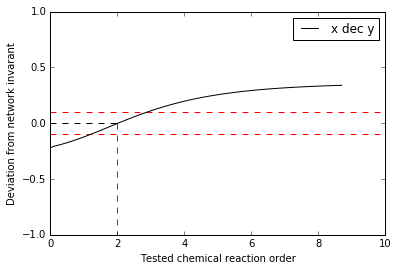

varying k
exponent = 2
 lhs:  1.5441545513856347  x decreases y:  1.540563283823229
does the flux balance? It should be:  0.8307814346906047
if x decreases y:  0.8313239224226537
this is what x is 0.20783098060566343
this is what k is 2


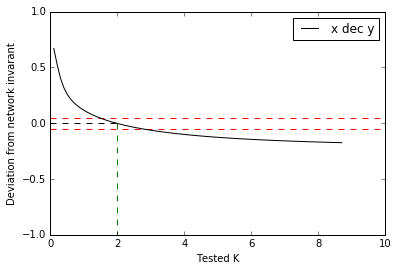

In [3]:
neg_2_comp(2, 2, 5, 4, 1, 1)